In [2]:
import numpy as np

In [3]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [4]:
import pandas as pd

In [5]:
#sdd = sorted_data_delhi
sdd = pd.read_csv('/Users/adithya/Downloads/machine_learning/ML_LAB/clean_Data_delhi2.csv')

In [6]:
y = sdd.iloc[0:, 1].values

In [7]:
y

array(['Haze', 'Haze', 'Haze', ..., 'Fog', 'Fog', 'Fog'], dtype=object)

In [8]:
sdd.head()

,hum,conds,tempm,month,pressurem,year,day
0,64.0,Haze,18.0,11,1011.0,1996,4
1,50.0,Haze,34.0,8,1001.0,2006,25
2,53.0,Haze,33.0,8,1003.0,2006,24
3,47.0,Haze,35.0,8,1000.0,2006,24
4,46.0,Haze,35.0,8,999.0,2006,24


In [9]:
sdd.tail()

,hum,conds,tempm,month,pressurem,year,day
49933,77.0,Fog,14.0,1,1011.0,2003,23
49934,100.0,Fog,7.0,1,1014.0,1999,31
49935,100.0,Fog,7.0,1,1014.0,1999,31
49936,100.0,Fog,7.0,1,1013.0,1999,31
49937,100.0,Fog,5.0,1,1020.0,2003,19


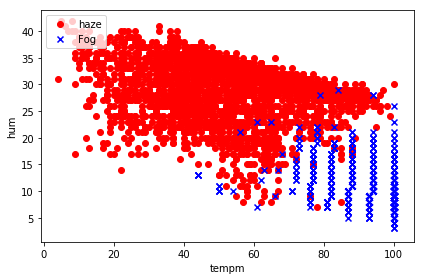

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = sdd.iloc[0:, 1].values
y = np.where(y == 'Haze', -1, 1)

# extract sepal length and petal length
X = sdd.iloc[0:, [0, 2]].values

# plot data
#plt.scatter(X[26969:90451, 0], X[26929:90451, 1],
#            color='red', marker='o', label='Fog')
plt.scatter(X[0:2714, 0], X[0:2714, 1],
            color='red', marker='o', label='haze')
plt.scatter(X[47225:49939, 0], X[47225:49939, 1],
            color='blue', marker='x', label='Fog')

plt.xlabel('tempm')
plt.ylabel('hum')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./iris_1.png', dpi=300)
plt.show()

In [11]:
X

array([[  64.,   18.],
       [  50.,   34.],
       [  53.,   33.],
       ..., 
       [ 100.,    7.],
       [ 100.,    7.],
       [ 100.,    5.]])

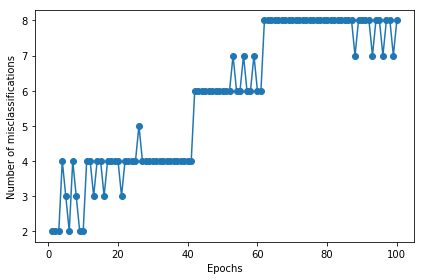

In [12]:
ppn = Perceptron(eta=0.001, n_iter=100)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

In [14]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


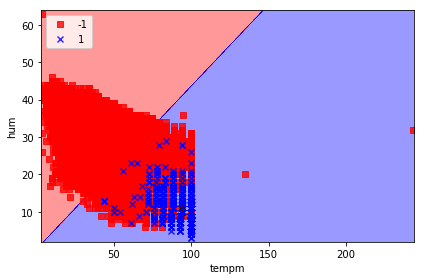

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('tempm')
plt.ylabel('hum')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

In [18]:
ppn.errors_

[2, 2, 2, 4, 3, 2, 4, 3, 2, 2]